# Beeler-Reuter model (1977) [8 variables]

- The first ventricular model was published by Beeler and Reuter in 1977. 
- This model uses four of the eight different ionic currents known at the time in cardiac muscle. 

~~~
They implemented 
- fast inward Na+ current INa, similar to the one used by Hodgkin and Huxley, but they added a second slower inactivation gate j, 
- time-dependent outward current Ix1
- time-independent K+ outward current IK1
- slow inward current Is carried primarily by Ca2+
~~~

- The total ionic current in the Beeler-Reuter model is given by four currents, and the model uses eight variables.

- The Beeler-Reuter model was the first ionic model simulated in 2D, by Courtemanche and Winfree (1991). It not only showed for the first time that ionic models could produce spiral waves, but that in fact they could break up into multiple waves

In [1]:
import matplotlib.pyplot as plt
import myokit
import numpy as np
from ParamAP_lib import ParamAP
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the model
model = myokit.load_model('br-1977.mmt')

In [3]:
model.name()

'Beeler-Reuter-1977'

![alt text](beeler_reuter_1977.png)

![alt text](cellml_rendering.gif)

~~~
====VARS====
 1 engine.time         0.0
 2 engine.pace         0.0
 3 stimulus.amplitude  -0.4043884410576001
 4 stimulus.IStim      0.0
 5 membrane.C          1.0
 6 ina.gNaBar          4.0
 7 ina.gNaC            0.003
 8 ina.ENa             50.0
 9 ina.INa             -0.4043884410576001
10 isi.gsBar           0.09
11 isi.Es              118.66702613627932
12 isi.Isi             -0.05433915668622746
13 ik1.IK1             0.4597368595843396
14 ix1.Ix1             -0.0006120377539367129
====STATES====
 1 ina.m              0.07487383922805191
 2 ina.h              -0.0017889188947885458
 3 ina.j              -0.00030625500683357414
 4 isi.d              -5.1199390429185e-06
 5 isi.f              0.00018837411468821587
 6 isi.Cai            -1.5660843313772546e-09
 7 ix1.x1             -3.2168281420791816e-07
 8 membrane.V         -0.0003972240865753318
~~~

The total ionic current in the BR model is given by four currents and uses eight variables: membrane potential, six ionic gates ( m, h, j, x1, f and j ) and the intracellular calcium concentration ([Ca] ).

In [4]:
model.count_equations(), list(model.equations())

(22,
 [<Equation engine.time = 0>,
  <Equation engine.pace = 0>,
  <Equation stimulus.amplitude = 25 [uA/cm^2]>,
  <Equation stimulus.IStim = engine.pace * stimulus.amplitude>,
  <Equation membrane.C = 1 [uF/cm^2]>,
  <Equation dot(membrane.V) = -(1 / membrane.C) * (ik1.IK1 + ix1.Ix1 + ina.INa + isi.Isi - stimulus.IStim)>,
  <Equation ina.gNaBar = 4 [mS/cm^2]>,
  <Equation ina.gNaC = 0.003 [mS/cm^2]>,
  <Equation ina.ENa = 50 [mV]>,
  <Equation ina.INa = (ina.gNaBar * ina.m ^ 3 * ina.h * ina.j + ina.gNaC) * (membrane.V - ina.ENa)>,
  <Equation dot(ina.m) = alpha * (1 - ina.m) - beta * ina.m>,
  <Equation dot(ina.h) = alpha * (1 - ina.h) - beta * ina.h>,
  <Equation dot(ina.j) = alpha * (1 - ina.j) - beta * ina.j>,
  <Equation isi.gsBar = 0.09>,
  <Equation isi.Es = -82.3 - 13.0287 * log(isi.Cai)>,
  <Equation isi.Isi = isi.gsBar * isi.d * isi.f * (membrane.V - isi.Es)>,
  <Equation dot(isi.d) = alpha * (1 - isi.d) - beta * isi.d>,
  <Equation dot(isi.f) = alpha * (1 - isi.f) - beta * i

In [5]:
model.components()

dict_values([<Component(engine)>, <Component(stimulus)>, <Component(membrane)>, <Component(ina)>, <Component(isi)>, <Component(ik1)>, <Component(ix1)>])

# APA APDS

In [6]:
# Load the protocol
protocol = myokit.load_protocol('br-1977-step-protocol.mmt')

In [7]:
# Get the duration of the protocol
t_max = protocol.characteristic_time()

In [8]:
# Get a simulation log with data points representing the protocol
log_p = protocol.log_for_interval(0, t_max, for_drawing=True)

In [9]:
s = myokit.Simulation(model, protocol)
log = s.run(t_max)

In [10]:
time = np.array(log['engine.time'])
V_m = np.array(log['membrane.V'])
max_ = V_m.max()
min_ = V_m.min()
apa = max_ - min_

apds = []
left = []
right = []
height = []

for i in [0.2, 0.5, 0.9]:
    apd_threshold = (max_ - min_) * (1 - i) + min_
    idx_set = np.where(V_m > apd_threshold)[0]

    right.append(int(time[idx_set[-1]])) 
    left.append(int(time[idx_set[0]]))
    height.append(V_m[idx_set[-1]])
    apd = time[idx_set[-1]] - time[idx_set[0]]
    apds.append(apd)    

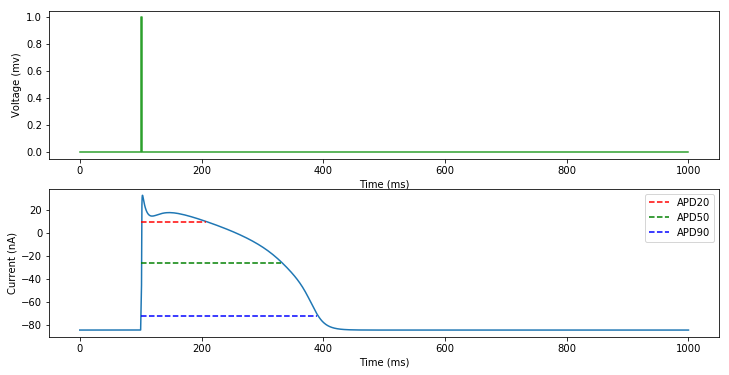

In [11]:
# Show the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mv)')
plt.plot(log_p['time'], log_p['pace'], color='tab:green')

plt.subplot(2, 1, 2)
plt.xlabel('Time (ms)')
plt.ylabel('Current (nA)')
plt.plot(log['engine.time'], log['membrane.V'])
plt.plot(range(left[0], right[0]), [height[0]] * (right[0] - left[0]), color='r', linestyle='--', label='APD20')
plt.plot(range(left[1], right[1]), [height[1]] * (right[1] - left[1]), color='g', linestyle='--', label='APD50')
plt.plot(range(left[2] , right[2]), [height[2]] * (right[2] - left[2]), color='b', linestyle='--', label='APD90')
plt.legend()
plt.show()

In [12]:
print("AP height ", apa, "mV")
print("APD20     ", apds[0], "ms")
print("APD50     ", apds[1], "ms")
print("APD90     ", apds[2], "ms")

AP height  117.32901946960169 mV
APD20      107.79589913230475 ms
APD50      230.30925230023342 ms
APD90      291.41438393058945 ms


In [13]:
class Model():
    logs = []
    apas = []
    apds20 = []
    apds50 = []
    apds90 = []
    
    def __init__(self, model_path, protocol_path):
        self.model = myokit.load_model('br-1977.mmt')
        self.protocol = myokit.load_protocol('br-1977-step-protocol.mmt')
        self.t_max = protocol.characteristic_time()
        
        
    def get_apa(self, membrane_V):
        max_ = membrane_V.max()
        min_ = membrane_V.min()
    
        apa = max_ - min_
        return apa
        
    def get_APD(self, time, V_m, APD):
    
        max_ = V_m.max()
        min_ = V_m.min()
    
        apd_threshold = (max_ - min_) * (1 - APD) + min_
        idx_set = np.where(V_m > apd_threshold)[0]
        apd = time[idx_set[-1]] - time[idx_set[0]]
    
        return apd
    def variate_params(self, param_name, param_range):
        self.param_name = param_name
        self.param_range = param_range
        self.apas = []
        self.apds20 = []
        self.apds50 = []
        self.apds90 = []
        self.logs = []
        for p in param_range:
            #self.model = myokit.load_model('br-1977.mmt')
        
            p1 = self.model.get(param_name) 
            p1.set_rhs(p)  
            s = myokit.Simulation(self.model, self.protocol)
            log = s.run(self.t_max)
            self.logs.append(log)
            
            engine_time = np.array(log['engine.time'])
            membrane_V = np.array(log['membrane.V'])
            
            self.apas.append(self.get_apa(membrane_V))
            self.apds20.append(self.get_APD(engine_time, membrane_V, 0.2))
            self.apds50.append(self.get_APD(engine_time, membrane_V, 0.5))
            self.apds90.append(self.get_APD(engine_time, membrane_V, 0.9))
   
            
    def plot_APDS(self):
        
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        plt.title('APDs')
        plt.xlabel(self.param_name)
        plt.ylabel('APD Time (ms)')
        plt.plot(self.param_range, self.apds20, color='r', linestyle='--', label='APD20')
        plt.plot(self.param_range, self.apds50, color='g', linestyle='--', label='APD50')
        plt.plot(self.param_range, self.apds90, color='b', linestyle='--', label='APD90')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.title('APAs')
        plt.xlabel(self.param_name)
        plt.ylabel('Current (nA)')
        plt.plot(self.param_range, self.apas, color='r', linestyle='--', label='APA')
        plt.legend()
        plt.show()
    
    def plot_AP(self):
        
        n = len(self.param_range)
        plt.figure(figsize=(16,12))
        for i in range(0, n):
            plt.subplot(4, 4, i+1)
            plt.plot(self.logs[i]['engine.time'], self.logs[i]['membrane.V'])
    
            plt.xlabel('Time (ms)')
            plt.ylabel('Current (nA)')
            plt.tight_layout()
            plt.title(self.param_name + ' ' +str(round(list(self.param_range)[i], 2)))
    
        plt.show()
        
    def plot_AP_transparent(self):
        n = len(self.param_range)
        plt.figure(figsize=(8,4))
        for i in range(0, n):
            plt.plot(self.logs[i]['engine.time'], self.logs[i]['membrane.V'], alpha=1-0.05*i, color ='r', label=self.param_name + ' ' +str(round(list(self.param_range)[i], 2)))
            plt.xlabel('Time (ms)')
            plt.ylabel('Current (nA)')
        plt.legend()
        plt.show()
    
    def plot_AP_colorful(self):
        n = len(self.param_range)
        plt.figure(figsize=(8,4))
        for i in range(0, n):
            plt.plot(self.logs[i]['engine.time'], self.logs[i]['membrane.V'], label=self.param_name + ' ' +str(round(list(self.param_range)[i], 2)))
            plt.xlabel('Time (ms)')
            plt.ylabel('Current (nA)')
        plt.legend()
        plt.show()
    def plot_AP_3d(self):
        n = len(self.param_range)
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        
        for i in range(0, n):
            ax.plot(self.logs[i]['engine.time'], self.logs[i]['membrane.V'], zs=i, zdir='y', label='curve in (x,y)')

## gs
- The calcium current is largely responsible for the plateau phase of the AP, so that decreasing the calcium conductance __gs__ decreases the calcium current and thus the APD. 
- Decreasing __gs__ from 0.09 to 0.04 mmho/cm^2 shortens the __APD__ by about 50 percent, and the __AP__ shape becomes more triangular. 
- A further decrease of __gs__ to 0.01 yields an __AP__ similar to the HH model. 
- On the other hand, increasing __gs__ to 0.2 mmho/cm^2 prolongs the __AP__ and changes its shape yet again by making the secondary rise in potential more prominent.

In [14]:
m1 = Model('br-1977.mmt', 'br-1977-step-protocol.mmt')
m1.variate_params(param_name='isi.gsBar', param_range=np.arange(0.01, 0.24, 0.02))# gsBar = 0.09

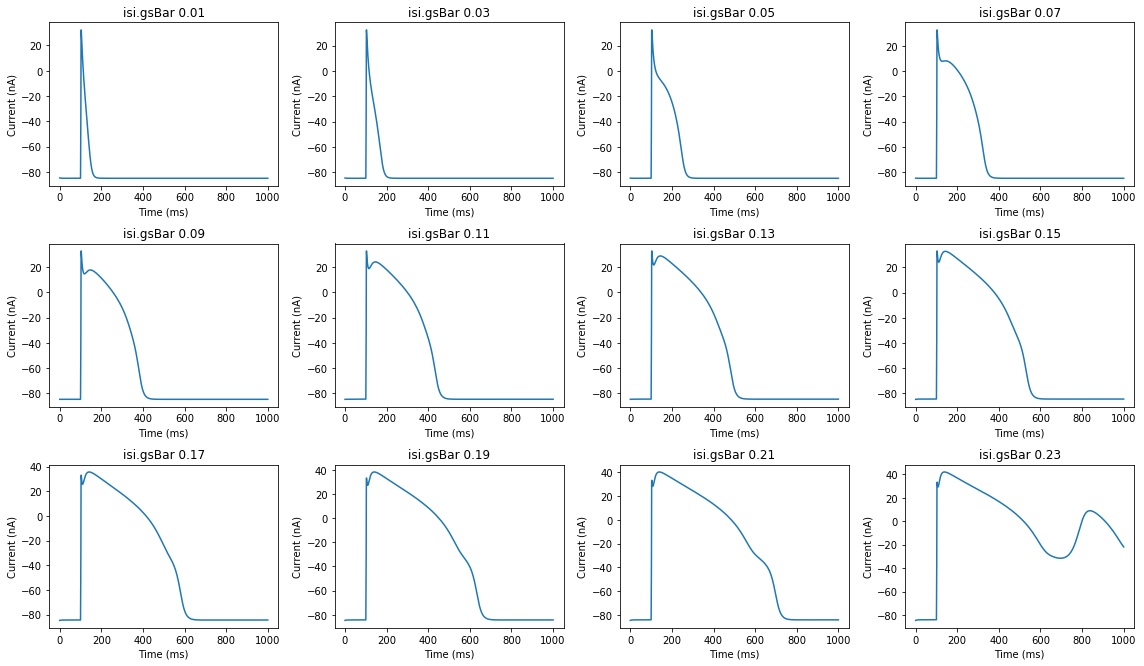

In [15]:
m1.plot_AP()

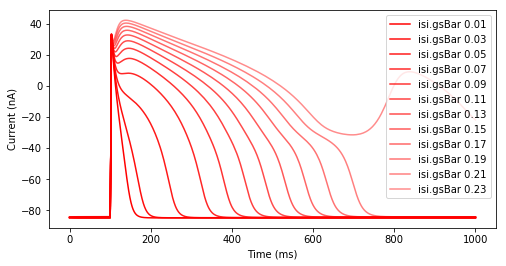

In [16]:
m1.plot_AP_transparent()

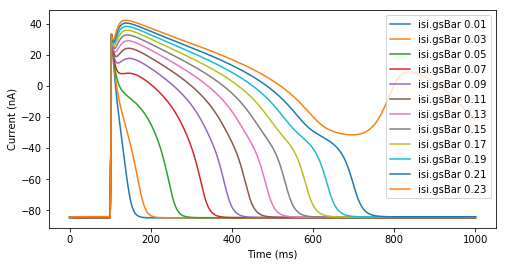

In [17]:
m1.plot_AP_colorful()

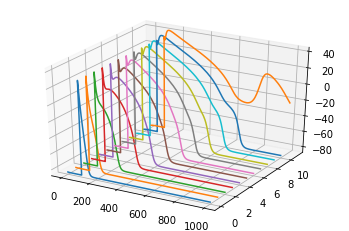

In [18]:
m1.plot_AP_3d()

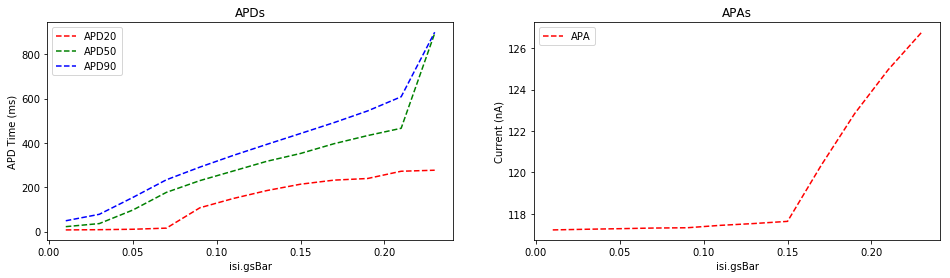

In [19]:
m1.plot_APDS()

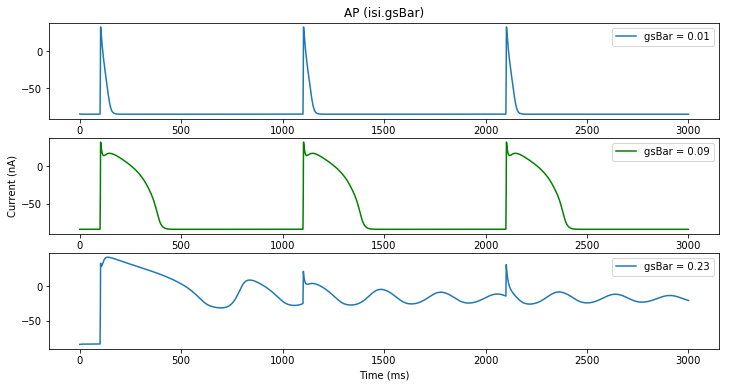

In [72]:
model = myokit.load_model('br-1977.mmt')
protocol = myokit.load_protocol('br-1977-step-protocol.mmt')
t_max = protocol.characteristic_time()

params_gsBar = [0.01, 0.09, 0.23]
logs_gsBar = []

for i in params_gsBar:
    
    p1 = model.get('isi.gsBar') 
    p1.set_rhs(i)  
    s = myokit.Simulation(model, protocol)
    log = s.run(t_max * 3)
    logs_gsBar.append(log)
plt.figure(figsize=(12, 6))


plt.subplot(3, 1, 1)
plt.title('AP (isi.gsBar)')
plt.plot(logs_gsBar[0]['engine.time'], logs_gsBar[0]['membrane.V'], label = 'gsBar = 0.01')
plt.legend()

plt.subplot(3, 1, 2)
plt.ylabel('Current (nA)')
plt.plot(logs_gsBar[1]['engine.time'], logs_gsBar[1]['membrane.V'], label = 'gsBar = 0.09', color='g')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(logs_gsBar[2]['engine.time'], logs_gsBar[2]['membrane.V'], label = 'gsBar = 0.23')
plt.xlabel('Time (ms)')
plt.legend()

plt.show()

## gNA
- As in the HH model, the sodium conductance __gNa__ is responsible for the rise of the __AP__, and changes to this value also can affect the AP shape and duration. 
- Reducing __gNa__ to 1.0 or to 0.9, for example, decreases the maximum depolarization, allowing less time for the calcium to activate and producing a smaller AP. 
- Increasing __gNa__ increases the excitability of the system and makes it easier to induce activations. 
- By changing __gNa__ to 20 mmho/cm^2 , for instance, the second activation becomes substantially longer because the increased sodium conductance allows a higher depolarization and therefore more time for the calcium current to activate. Under these conditions, it is easier to induce subsequent activations. 

In [20]:
m2 = Model('br-1977.mmt', 'br-1977-step-protocol.mmt')
m2.variate_params(param_name='ina.gNaBar', param_range=np.arange(1, 13, 1))

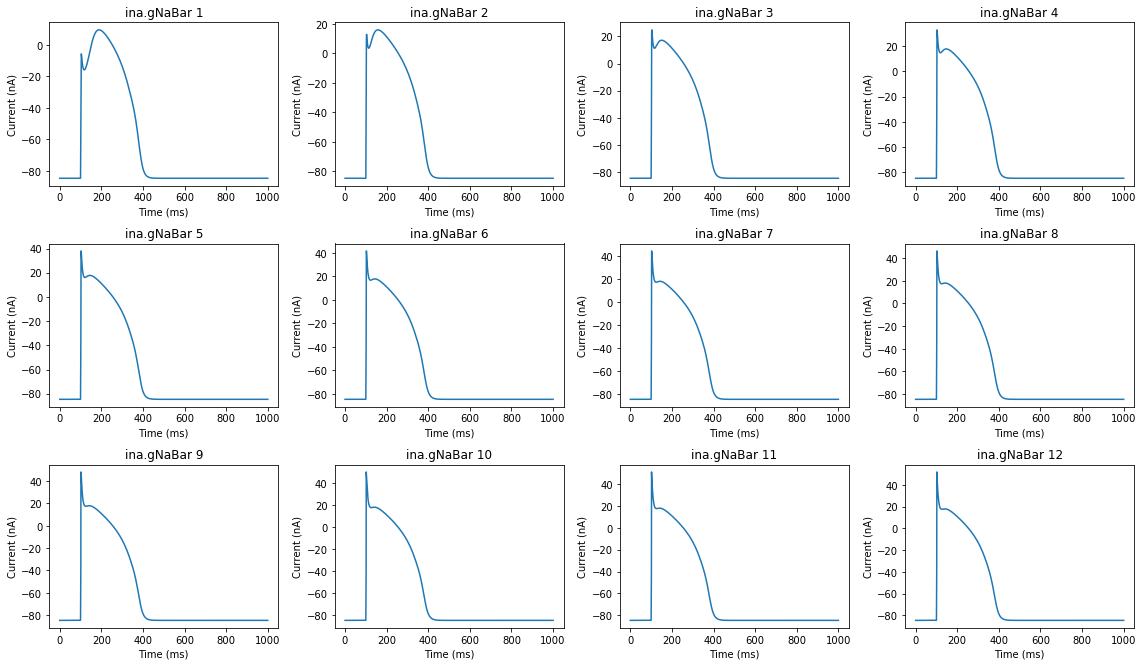

In [21]:
m2.plot_AP()

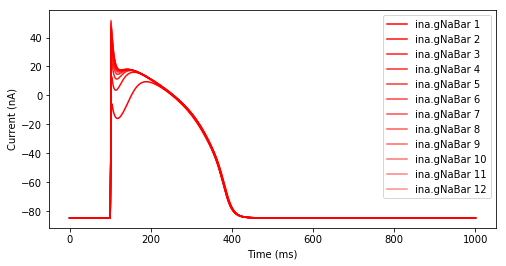

In [22]:
m2.plot_AP_transparent()

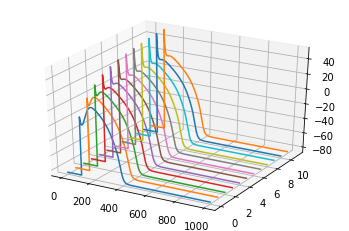

In [81]:
m2.plot_AP_3d()

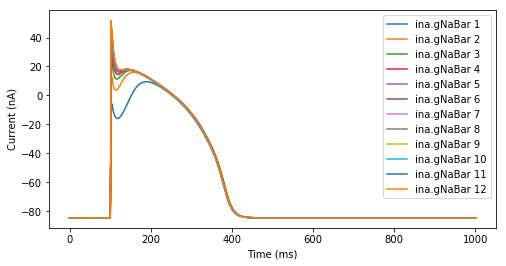

In [23]:
m2.plot_AP_colorful()

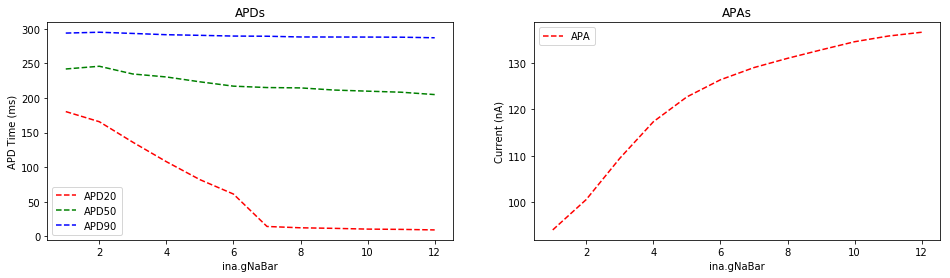

In [24]:
m2.plot_APDS()

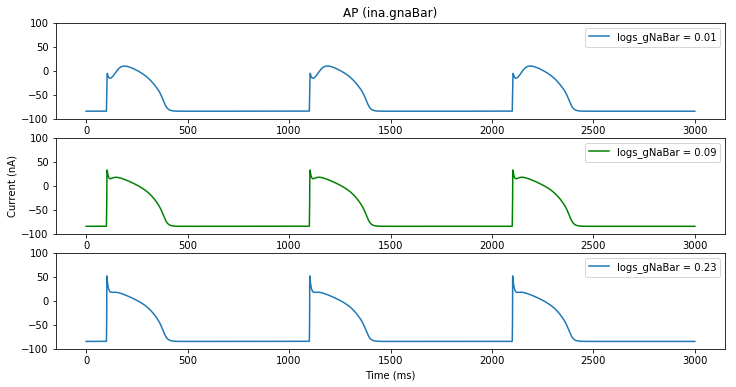

In [79]:
model = myokit.load_model('br-1977.mmt')
protocol = myokit.load_protocol('br-1977-step-protocol.mmt')
t_max = protocol.characteristic_time()

params_gNaBar = [1, 4, 12]
logs_gNaBar = []
for i in params_gNaBar:
    
    p1 = model.get('ina.gNaBar') 
    p1.set_rhs(i)  
    s = myokit.Simulation(model, protocol)
    log = s.run(t_max * 3)
    logs_gNaBar.append(log)
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.title('AP (ina.gnaBar)')
plt.ylim(-100, 100)
plt.plot(logs_gNaBar[0]['engine.time'], logs_gNaBar[0]['membrane.V'], label = 'logs_gNaBar = 0.01')
plt.legend()

plt.subplot(3, 1, 2)
plt.ylabel('Current (nA)')
plt.ylim(-100, 100)
plt.plot(logs_gNaBar[1]['engine.time'], logs_gNaBar[1]['membrane.V'], label = 'logs_gNaBar = 0.09', color='g')
plt.legend()

plt.subplot(3, 1, 3)
plt.ylim(-100, 100)
plt.plot(logs_gNaBar[2]['engine.time'], logs_gNaBar[2]['membrane.V'], label = 'logs_gNaBar = 0.23')
plt.xlabel('Time (ms)')
plt.legend()

plt.show()

# Jacobian

In [25]:
#J = myokit.JacobianCalculator(model)

In [26]:
#J.newton_root()

In [27]:
#J.calculate(model.state())

# Paramap

In [28]:
#log = s.run(t_max * 4)

In [29]:
#len(time)

In [30]:
#t = np.arange(0, 1664.) # Равномерная вычислительная сетка по времени

In [31]:
#len(V_m), len(time)

In [32]:
#time = np.array(log['engine.time'])
#V_m = np.array(log['membrane.V'])
#XY = [t, V_m]
#ParamAP(XY)

In [33]:
#F = open('protocol.txt','r') 
#F.readlines()

In [34]:
#from IPython.display import IFrame
#IFrame("./output.pdf", width=800, height=1000)

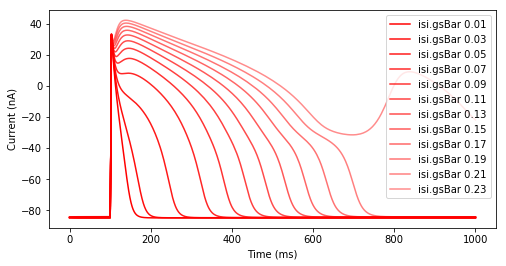

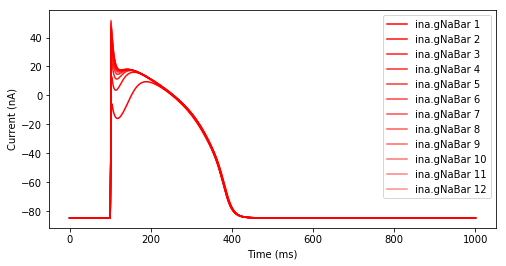

In [35]:
m1.plot_AP_transparent()
m2.plot_AP_transparent()

In [80]:
#m1.plot_APDS()
#m2.plot_APDS()